# Scatter Plot Hate Crime Rate vs Foreign Born Rate


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

In [ ]:
hate_crime_csv = "Resources/Crime Resources/hate_crime_by_county_2012-2016_final.csv"
foreign_csv = "Resources/Census Resources/census_immig.csv"

hate_crime_df = pd.read_csv(hate_crime_csv)
foreign_df = pd.read_csv(foreign_csv)


In [68]:
hate_crime_df['2012-2016 Combined Crime Rate'] = round(hate_crime_df["Total Crimes"].astype("float") / hate_crime_df["Population"] * 100000,3)
hate_crime_df = hate_crime_df[["FIPS","State","2012-2016 Combined Crime Rate"]]
hate_crime_df = hate_crime_df.loc[hate_crime_df['2012-2016 Combined Crime Rate'] != 0.0]

hate_crime_df.tail()

,FIPS,State,2012-2016 Combined Crime Rate
1185,55109,Wisconsin,1.153
1186,55117,Wisconsin,2.603
1187,55133,Wisconsin,0.506
1188,56005,Wyoming,12.378
1189,56007,Wyoming,6.371


In [8]:
foreign_df = foreign_df[["combined_fips","ForeignBorn_Rate"]]
foreign_df = foreign_df.rename(columns={'combined_fips': 'FIPS'})
foreign_df.head()

,FIPS,ForeignBorn_Rate
0,1001,1.838362
1,1003,3.269510
2,1005,2.859397
3,1007,1.351232
4,1009,4.271801


In [90]:
hate_vs_foreign = pd.merge(hate_crime_df, foreign_df, on="FIPS", how="left")
hate_vs_foreign.head()


,FIPS,State,2012-2016 Combined Crime Rate,ForeignBorn_Rate
0,1001,Alabama,12.716,1.838362
1,1003,Alabama,0.501,3.269510
2,1073,Alabama,4.097,3.925832
3,1077,Alabama,3.238,2.053087
4,1121,Alabama,2.467,1.540891


In [196]:
#Dataframes by region
neweng_df = hate_vs_foreign.loc[(hate_vs_foreign['State'] == 'Connecticut')|(hate_vs_foreign['State'] == 'Maine')|(hate_vs_foreign['State'] == 'Massachussets')|(hate_vs_foreign['State'] == 'New Hampshire')|(hate_vs_foreign['State'] == 'Rhode Island')|(hate_vs_foreign['State'] == 'Vermont')]
midatl_df = hate_vs_foreign.loc[(hate_vs_foreign['State'] == 'New Jersey')|(hate_vs_foreign['State'] == 'New York')|(hate_vs_foreign['State'] == 'Pennsylvania')]
enctl_df = hate_vs_foreign.loc[(hate_vs_foreign['State'] == 'Illinois')|(hate_vs_foreign['State'] == 'Indiana')|(hate_vs_foreign['State'] == 'Michigan')|(hate_vs_foreign['State'] == 'Ohio')|(hate_vs_foreign['State'] == 'Wisconsin')]
wnctl_df = hate_vs_foreign.loc[(hate_vs_foreign['State'] == 'Iowa')|(hate_vs_foreign['State'] == 'Kansas')|(hate_vs_foreign['State'] == 'Minnesota')|(hate_vs_foreign['State'] == 'Missouri')|(hate_vs_foreign['State'] == 'Nebraska')|(hate_vs_foreign['State'] == 'North Dakota')|(hate_vs_foreign['State'] == 'South Dakota')]
satl_df = hate_vs_foreign.loc[(hate_vs_foreign['State'] == 'Delaware')|(hate_vs_foreign['State'] == 'Florida')|(hate_vs_foreign['State'] == 'Georgia')|(hate_vs_foreign['State'] == 'Maryland')|(hate_vs_foreign['State'] == 'North Carolina')|(hate_vs_foreign['State'] == 'South Carolina')|(hate_vs_foreign['State'] == 'Virginia')|(hate_vs_foreign['State'] == 'District of Columbia')|(hate_vs_foreign['State'] == 'West Virginia')]
esctl_df = hate_vs_foreign.loc[(hate_vs_foreign['State'] == 'Alabama')|(hate_vs_foreign['State'] == 'Kentucky')|(hate_vs_foreign['State'] == 'Mississippi')|(hate_vs_foreign['State'] == 'Tennessee')]
wsctl_df = hate_vs_foreign.loc[(hate_vs_foreign['State'] == 'Arkansas')|(hate_vs_foreign['State'] == 'Louisiana')|(hate_vs_foreign['State'] == 'Oklahoma')|(hate_vs_foreign['State'] == 'Texas')]
mountain_df = hate_vs_foreign.loc[(hate_vs_foreign['State'] == 'Arizona')|(hate_vs_foreign['State'] == 'Colorado')|(hate_vs_foreign['State'] == 'Idaho')|(hate_vs_foreign['State'] == 'Montana')|(hate_vs_foreign['State'] == 'Nevada')|(hate_vs_foreign['State'] == 'New Mexico')|(hate_vs_foreign['State'] == 'Utah')|(hate_vs_foreign['State'] == 'Wyoming')]
pacific_df = hate_vs_foreign.loc[(hate_vs_foreign['State'] == 'California')|(hate_vs_foreign['State'] == 'Washington')|(hate_vs_foreign['State'] == 'Oregon')|(hate_vs_foreign['State'] == 'Alaska')|(hate_vs_foreign['State'] == 'Hawaii')]

neweng_dp = crime_vs_poverty.loc[(crime_vs_poverty['State'] == 'Connecticut')|(crime_vs_poverty['State'] == 'Maine')|(crime_vs_poverty['State'] == 'Massachussets')|(crime_vs_poverty['State'] == 'New Hampshire')|(crime_vs_poverty['State'] == 'Rhode Island')|(crime_vs_poverty['State'] == 'Vermont')]
midatl_dp = crime_vs_poverty.loc[(crime_vs_poverty['State'] == 'New Jersey')|(crime_vs_poverty['State'] == 'New York')|(crime_vs_poverty['State'] == 'Pennsylvania')]
enctl_dp = crime_vs_poverty.loc[(crime_vs_poverty['State'] == 'Illinois')|(crime_vs_poverty['State'] == 'Indiana')|(crime_vs_poverty['State'] == 'Michigan')|(crime_vs_poverty['State'] == 'Ohio')|(crime_vs_poverty['State'] == 'Wisconsin')]
wnctl_dp = crime_vs_poverty.loc[(crime_vs_poverty['State'] == 'Iowa')|(crime_vs_poverty['State'] == 'Kansas')|(crime_vs_poverty['State'] == 'Minnesota')|(crime_vs_poverty['State'] == 'Missouri')|(crime_vs_poverty['State'] == 'Nebraska')|(crime_vs_poverty['State'] == 'North Dakota')|(crime_vs_poverty['State'] == 'South Dakota')]
satl_dp = crime_vs_poverty.loc[(crime_vs_poverty['State'] == 'Delaware')|(crime_vs_poverty['State'] == 'Florida')|(crime_vs_poverty['State'] == 'Georgia')|(crime_vs_poverty['State'] == 'Maryland')|(crime_vs_poverty['State'] == 'North Carolina')|(crime_vs_poverty['State'] == 'South Carolina')|(crime_vs_poverty['State'] == 'Virginia')|(crime_vs_poverty['State'] == 'District of Columbia')|(crime_vs_poverty['State'] == 'West Virginia')]
esctl_dp = crime_vs_poverty.loc[(crime_vs_poverty['State'] == 'Alabama')|(crime_vs_poverty['State'] == 'Kentucky')|(crime_vs_poverty['State'] == 'Mississippi')|(crime_vs_poverty['State'] == 'Tennessee')]
wsctl_dp = crime_vs_poverty.loc[(crime_vs_poverty['State'] == 'Arkansas')|(crime_vs_poverty['State'] == 'Louisiana')|(crime_vs_poverty['State'] == 'Oklahoma')|(crime_vs_poverty['State'] == 'Texas')]
mountain_dp = crime_vs_poverty.loc[(crime_vs_poverty['State'] == 'Arizona')|(crime_vs_poverty['State'] == 'Colorado')|(crime_vs_poverty['State'] == 'Idaho')|(crime_vs_poverty['State'] == 'Montana')|(crime_vs_poverty['State'] == 'Nevada')|(crime_vs_poverty['State'] == 'New Mexico')|(crime_vs_poverty['State'] == 'Utah')|(crime_vs_poverty['State'] == 'Wyoming')]
pacific_dp = crime_vs_poverty.loc[(crime_vs_poverty['State'] == 'California')|(crime_vs_poverty['State'] == 'Washington')|(crime_vs_poverty['State'] == 'Oregon')|(crime_vs_poverty['State'] == 'Alaska')|(crime_vs_poverty['State'] == 'Hawaii')]

neweng_di = crime_vs_income.loc[(crime_vs_income['State'] == 'Connecticut')|(crime_vs_income['State'] == 'Maine')|(crime_vs_income['State'] == 'Massachussets')|(crime_vs_income['State'] == 'New Hampshire')|(crime_vs_income['State'] == 'Rhode Island')|(crime_vs_income['State'] == 'Vermont')]
midatl_di = crime_vs_income.loc[(crime_vs_income['State'] == 'New Jersey')|(crime_vs_income['State'] == 'New York')|(crime_vs_income['State'] == 'Pennsylvania')]
enctl_di = crime_vs_income.loc[(crime_vs_income['State'] == 'Illinois')|(crime_vs_income['State'] == 'Indiana')|(crime_vs_income['State'] == 'Michigan')|(crime_vs_income['State'] == 'Ohio')|(crime_vs_income['State'] == 'Wisconsin')]
wnctl_di = crime_vs_income.loc[(crime_vs_income['State'] == 'Iowa')|(crime_vs_income['State'] == 'Kansas')|(crime_vs_income['State'] == 'Minnesota')|(crime_vs_income['State'] == 'Missouri')|(crime_vs_income['State'] == 'Nebraska')|(crime_vs_income['State'] == 'North Dakota')|(crime_vs_income['State'] == 'South Dakota')]
satl_di = crime_vs_income.loc[(crime_vs_income['State'] == 'Delaware')|(crime_vs_income['State'] == 'Florida')|(crime_vs_income['State'] == 'Georgia')|(crime_vs_income['State'] == 'Maryland')|(crime_vs_income['State'] == 'North Carolina')|(crime_vs_income['State'] == 'South Carolina')|(crime_vs_income['State'] == 'Virginia')|(crime_vs_income['State'] == 'District of Columbia')|(crime_vs_income['State'] == 'West Virginia')]
esctl_di = crime_vs_income.loc[(crime_vs_income['State'] == 'Alabama')|(crime_vs_income['State'] == 'Kentucky')|(crime_vs_income['State'] == 'Mississippi')|(crime_vs_income['State'] == 'Tennessee')]
wsctl_di = crime_vs_income.loc[(crime_vs_income['State'] == 'Arkansas')|(crime_vs_income['State'] == 'Louisiana')|(crime_vs_income['State'] == 'Oklahoma')|(crime_vs_income['State'] == 'Texas')]
mountain_di = crime_vs_income.loc[(crime_vs_income['State'] == 'Arizona')|(crime_vs_income['State'] == 'Colorado')|(crime_vs_income['State'] == 'Idaho')|(crime_vs_income['State'] == 'Montana')|(crime_vs_income['State'] == 'Nevada')|(crime_vs_income['State'] == 'New Mexico')|(crime_vs_income['State'] == 'Utah')|(crime_vs_income['State'] == 'Wyoming')]
pacific_di = crime_vs_income.loc[(crime_vs_income['State'] == 'California')|(crime_vs_income['State'] == 'Washington')|(crime_vs_income['State'] == 'Oregon')|(crime_vs_income['State'] == 'Alaska')|(crime_vs_income['State'] == 'Hawaii')]

#Dataframes by sanctuary states
esctl_di.head()
#df.loc[(df['A'] == 'foo') & (df['B'] == 'one')]

,FIPS,State,2012-2016 Combined Crime Rate,Household Income
0,1001,Alabama,12.716,53099.0
1,1003,Alabama,0.501,51365.0
2,1073,Alabama,4.097,47220.0
3,1077,Alabama,3.238,43657.0
4,1121,Alabama,2.467,37923.0


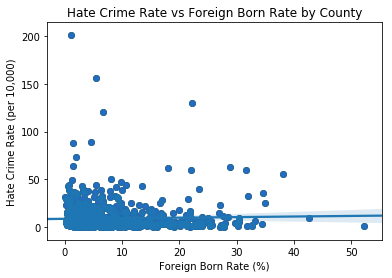

In [94]:
crime_rate = hate_vs_foreign["2012-2016 Combined Crime Rate"]
foreign = hate_vs_foreign["ForeignBorn_Rate"]
#colors = {'Texas':'black', 'Oklahoma':'black', 'Louisiana':'black','Arkansas' : 'black', 'California' : 'violet', 'Alaska' : 'violet', 'Hawaii' : 'violet', 'Oregon' : 'violet', 'Washington' : 'violet', 'Arizona' : 'olive', 'Colorado' : 'olive', 'Nevada' : 'olive', 'Idaho' : 'olive', 'Montana' : 'olive', 'Wyoming' : 'olive', 'Utah' : 'olive', 'New Mexico' : 'olive', 'North Dakota' : 'darkorange' , 'South Dakota' : 'darkorange', 'Nebraska' : 'darkorange', 'Kansas' : 'darkorange', 'Iowa' : 'darkorange', 'Missouri' : 'darkorange', 'Indiana' : 'red', 'Michigan' : 'red', 'Ohio' : 'red', 'Illinois' : 'red', 'Wisconsin' : 'red', 'Delaware' : 'blue', 'Maryland' : 'blue', 'District of Columbia' : 'blue', 'Virginia' : 'blue', 'North Carolina' : 'blue', 'South Carolina' : 'blue', 'Georgia' : 'blue', 'Florida' : 'blue', 'Maine' : 'green', 'Massachusets' : 'green', 'Vermont' : 'green', 'New Hampshire' : 'green', 'Rhode Island' : 'green', 'New York' : 'purple', 'Pennsylvania' : 'purple', 'New Jersey' : 'purple', 'Connecticut' : 'purple', 'Kentucky' : 'teal', 'Tennessee' : 'teal', 'Mississippi' : 'teal', 'Alabama' : 'teal'}
plt.clf()
plt.scatter(foreign, crime_rate, marker="o", facecolors="blue", edgecolors="black",linewidth=1, alpha=0.75)

sns.regplot(x=foreign, y=crime_rate, data=hate_vs_foreign);
plt.ylim(0,)
#plt.xlim(13,25)
plt.title("Hate Crime Rate vs Foreign Born Rate by County")
plt.ylabel("Hate Crime Rate (per 10,000)")
plt.xlabel("Foreign Born Rate (%)")
plt.savefig("Crime-vs-Foreign.png")
plt.show()


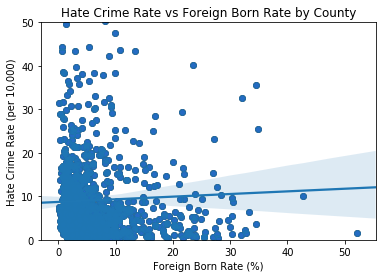

In [98]:
crime_rate = hate_vs_foreign["2012-2016 Combined Crime Rate"]
foreign = hate_vs_foreign["ForeignBorn_Rate"]
colors = {'Texas':'black', 'Oklahoma':'black', 'Louisiana':'black','Arkansas' : 'black', 'California' : 'violet', 'Alaska' : 'violet', 'Hawaii' : 'violet', 'Oregon' : 'violet', 'Washington' : 'violet', 'Arizona' : 'olive', 'Colorado' : 'olive', 'Nevada' : 'olive', 'Idaho' : 'olive', 'Montana' : 'olive', 'Wyoming' : 'olive', 'Utah' : 'olive', 'New Mexico' : 'olive', 'North Dakota' : 'darkorange' , 'South Dakota' : 'darkorange', 'Nebraska' : 'darkorange', 'Kansas' : 'darkorange', 'Iowa' : 'darkorange', 'Missouri' : 'darkorange', 'Indiana' : 'red', 'Michigan' : 'red', 'Ohio' : 'red', 'Illinois' : 'red', 'Wisconsin' : 'red', 'Delaware' : 'blue', 'Maryland' : 'blue', 'District of Columbia' : 'blue', 'Virginia' : 'blue', 'North Carolina' : 'blue', 'South Carolina' : 'blue', 'Georgia' : 'blue', 'Florida' : 'blue', 'Maine' : 'green', 'Massachusetts' : 'green', 'Vermont' : 'green', 'New Hampshire' : 'green', 'Rhode Island' : 'green', 'New York' : 'purple', 'Pennsylvania' : 'purple', 'New Jersey' : 'purple', 'Connecticut' : 'purple', 'Kentucky' : 'gold', 'Tennessee' : 'gold', 'Mississippi' : 'magenta', 'Alabama' : 'gold', 'Minnesota' : 'red', 'West Virginia' : 'blue'}
plt.clf()
plt.scatter(foreign, crime_rate, marker="o", facecolors="blue", edgecolors="black",
            linewidth=1, alpha=0.75)
sns.regplot(x=foreign, y=crime_rate, data=hate_vs_foreign);
plt.ylim(0,50)
#plt.xlim(13,25)
plt.title("Hate Crime Rate vs Foreign Born Rate by County")
plt.ylabel("Hate Crime Rate (per 10,000)")
plt.xlabel("Foreign Born Rate (%)")
plt.savefig("Crime-vs-Foreign_2.png")
plt.show()

In [181]:
poverty_df = pd.read_csv(foreign_csv)
poverty_df = poverty_df[["combined_fips","Poverty Rate"]]
poverty_df = poverty_df.rename(columns={'combined_fips': 'FIPS'})
poverty_df.head()

,FIPS,Poverty Rate
0,1001,12.165525
1,1003,12.806877
2,1005,23.427519
3,1007,15.018607
4,1009,16.361084


In [182]:
crime_vs_poverty = pd.merge(hate_crime_df, poverty_df, on="FIPS", how = "left")
crime_vs_poverty.tail()

,FIPS,State,2012-2016 Combined Crime Rate,Poverty Rate
1098,55109,Wisconsin,1.153,NaN
1099,55117,Wisconsin,2.603,NaN
1100,55133,Wisconsin,0.506,NaN
1101,56005,Wyoming,12.378,NaN
1102,56007,Wyoming,6.371,NaN


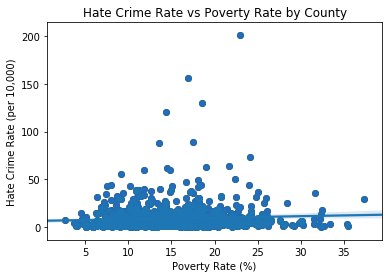

In [61]:
crime_rate = crime_vs_poverty["2012-2016 Combined Crime Rate"]
poverty = crime_vs_poverty["Poverty Rate"]

plt.clf()

plt.scatter(poverty, crime_rate, marker="o", facecolors="blue", edgecolors="black",
            linewidth=1, alpha=0.75)
sns.regplot(x=poverty, y=crime_rate, data=crime_vs_poverty);

plt.ylim(0,)
#plt.xlim(13,25)

plt.title("Hate Crime Rate vs Poverty Rate by County")
plt.ylabel("Hate Crime Rate (per 10,000)")
plt.xlabel("Poverty Rate (%)")
plt.savefig("Crime-vs-Poverty.png")
plt.show()

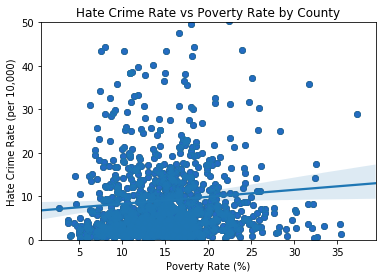

In [99]:
crime_rate = crime_vs_poverty["2012-2016 Combined Crime Rate"]
poverty = crime_vs_poverty["Poverty Rate"]

plt.clf()

plt.scatter(poverty, crime_rate, marker="o", facecolors="blue", edgecolors="black",
            linewidth=1, alpha=0.75)
sns.regplot(x=poverty, y=crime_rate, data=crime_vs_poverty);

plt.ylim(0,50)
#plt.xlim(13,25)

plt.title("Hate Crime Rate vs Poverty Rate by County")
plt.ylabel("Hate Crime Rate (per 10,000)")
plt.xlabel("Poverty Rate (%)")
plt.savefig("Crime-vs-Poverty_2.png")
plt.show()

In [21]:
income_df = pd.read_csv(foreign_csv)
income_df = income_df[["combined_fips","Household Income"]]
income_df = income_df.rename(columns={'combined_fips': 'FIPS'})
income_df.head()

,FIPS,Household Income
0,1001,53099.0
1,1003,51365.0
2,1005,33956.0
3,1007,39776.0
4,1009,46212.0


In [192]:
crime_vs_income = pd.merge(hate_crime_df, income_df, on="FIPS", how = "left")
crime_vs_income.tail()

,FIPS,State,2012-2016 Combined Crime Rate,Household Income
1098,55109,Wisconsin,1.153,73743.0
1099,55117,Wisconsin,2.603,54392.0
1100,55133,Wisconsin,0.506,78268.0
1101,56005,Wyoming,12.378,80822.0
1102,56007,Wyoming,6.371,56972.0


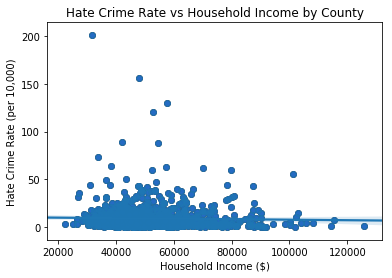

In [58]:
crime_rate = crime_vs_income["2012-2016 Combined Crime Rate"]
income = crime_vs_income["Household Income"]

plt.clf()


plt.scatter(income, crime_rate, marker="o", facecolors="blue", edgecolors="black",
            linewidth=1, alpha=0.75)
sns.regplot(x=income, y=crime_rate, data=crime_vs_income);

plt.ylim(0,)
#plt.xlim(13,25)
plt.title("Hate Crime Rate vs Household Income by County")
plt.ylabel("Hate Crime Rate (per 10,000)")
plt.xlabel("Household Income ($)")
plt.savefig("Crime-vs-Income.png")
plt.show()


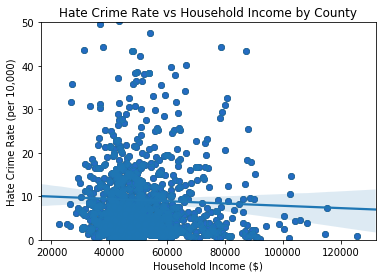

In [101]:
crime_rate = crime_vs_income["2012-2016 Combined Crime Rate"]
income = crime_vs_income["Household Income"]

plt.clf()


plt.scatter(income, crime_rate, marker="o", facecolors="blue", edgecolors="black",
            linewidth=1, alpha=0.75)
sns.regplot(x=income, y=crime_rate, data=crime_vs_income);

plt.ylim(0,50)
#plt.xlim(13,25)
plt.title("Hate Crime Rate vs Household Income by County")
plt.ylabel("Hate Crime Rate (per 10,000)")
plt.xlabel("Household Income ($)")
plt.savefig("Crime-vs-Income_2.png")
plt.show()


# Scatter Plot Hate Crime vs Foreign Born % by Region

<Figure size 432x288 with 0 Axes>

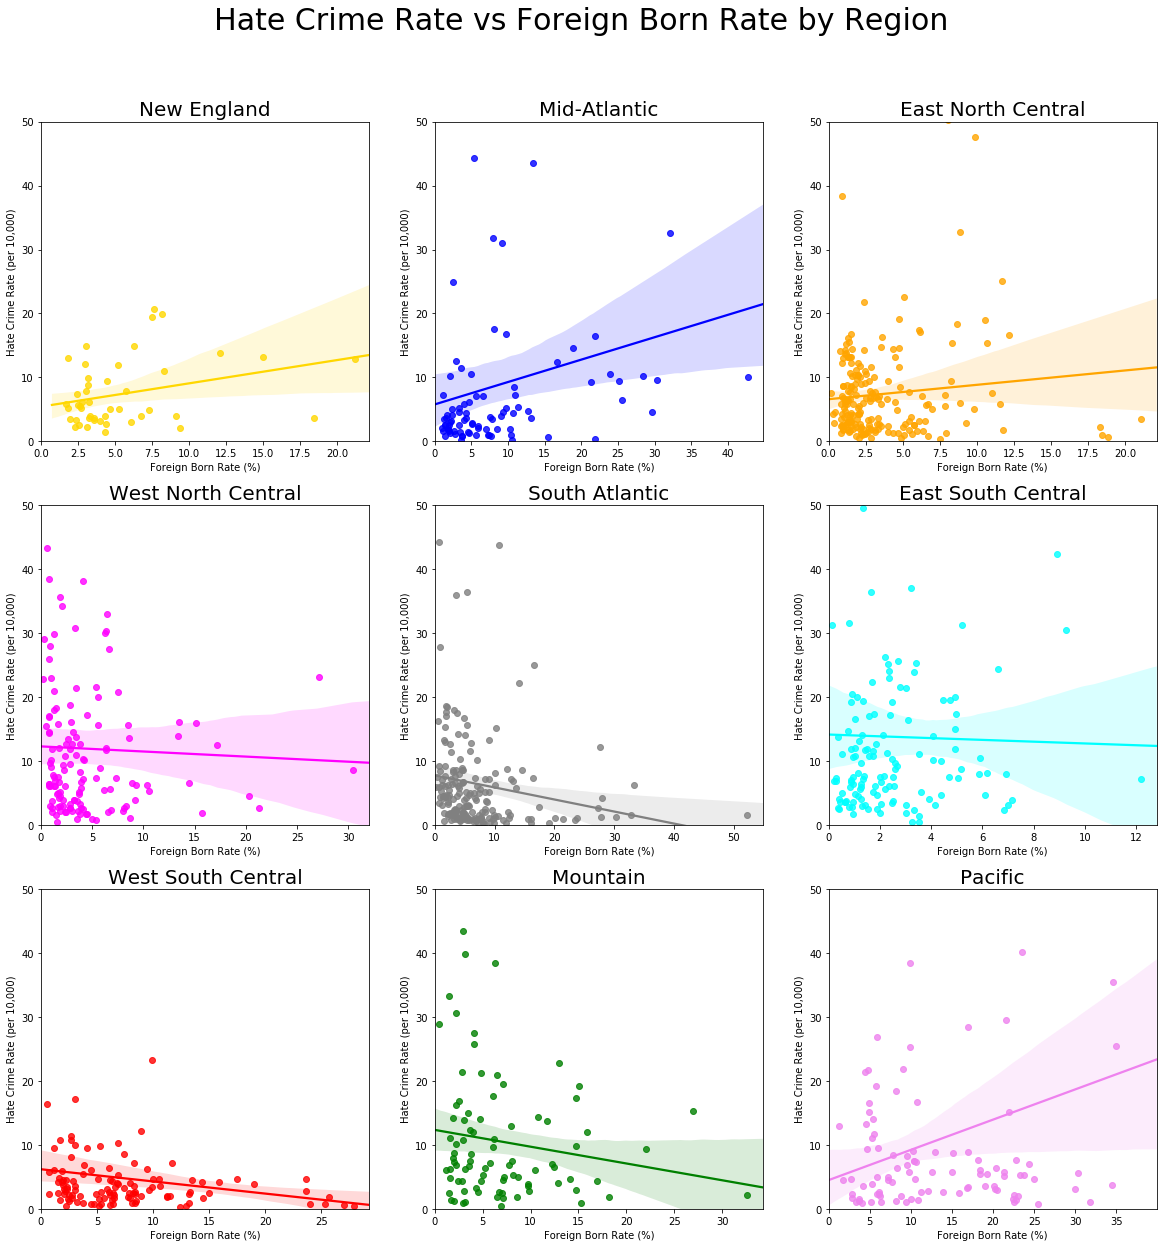

In [179]:
crime_rate = hate_vs_foreign["2012-2016 Combined Crime Rate"]
foreign = hate_vs_foreign["ForeignBorn_Rate"]

nweng_crm = neweng_df["2012-2016 Combined Crime Rate"]
nweng_frg = neweng_df["ForeignBorn_Rate"]
mdatl_crm = midatl_df["2012-2016 Combined Crime Rate"]
mdatl_frg = midatl_df["ForeignBorn_Rate"]
enctl_crm = enctl_df["2012-2016 Combined Crime Rate"]
enctl_frg = enctl_df["ForeignBorn_Rate"]
wnctl_crm = wnctl_df["2012-2016 Combined Crime Rate"]
wnctl_frg = wnctl_df["ForeignBorn_Rate"]
satl_crm = satl_df["2012-2016 Combined Crime Rate"]
satl_frg = satl_df["ForeignBorn_Rate"]
esctl_crm = esctl_df["2012-2016 Combined Crime Rate"]
esctl_frg = esctl_df["ForeignBorn_Rate"]
wsctl_crm = wsctl_df["2012-2016 Combined Crime Rate"]
wsctl_frg = wsctl_df["ForeignBorn_Rate"]
mtn_crm = mountain_df["2012-2016 Combined Crime Rate"]
mtn_frg = mountain_df["ForeignBorn_Rate"]
pac_crm = pacific_df["2012-2016 Combined Crime Rate"]
pac_frg = pacific_df["ForeignBorn_Rate"]

plt.clf()

fig, axs = plt.subplots(figsize=(20,20), ncols=3, nrows=3)
sns.regplot(x=nweng_frg, y=nweng_crm, data=neweng_df, color="gold", label="New England", ax=axs[0][0])
sns.regplot(x=mdatl_frg, y=mdatl_crm, data=midatl_df, color="blue", label="Mid-Atlantic", ax=axs[0][1])
sns.regplot(x=enctl_frg, y=enctl_crm, data=enctl_df, color="orange", label="East North Central", ax=axs[0][2])
sns.regplot(x=wnctl_frg, y=wnctl_crm, data=wnctl_df, color="magenta", label="West North Central", ax=axs[1][0])
sns.regplot(x=satl_frg, y=satl_crm, data=satl_df, color="gray", label="South Atlantic", ax=axs[1][1])
sns.regplot(x=esctl_frg, y=esctl_crm, data=esctl_df, color="cyan", label="East South Central", ax=axs[1][2])
sns.regplot(x=wsctl_frg, y=wsctl_crm, data=wsctl_df, color="red", label="West South Central", ax=axs[2][0])
sns.regplot(x=mtn_frg, y=mtn_crm, data=mountain_df, color="green", label="Mountain", ax=axs[2][1])
sns.regplot(x=pac_frg, y=pac_crm, data=pacific_df, color="violet", label="Pacific", ax=axs[2][2])

axs[0][0].set_title("New England", size=20)
axs[0][1].set_title("Mid-Atlantic", size=20)
axs[0][2].set_title("East North Central", size=20)
axs[1][0].set_title("West North Central", size=20)
axs[1][1].set_title("South Atlantic", size=20)
axs[1][2].set_title("East South Central", size=20)
axs[2][0].set_title("West South Central", size=20)
axs[2][1].set_title("Mountain", size=20)
axs[2][2].set_title("Pacific", size=20)

[axs[i][0].set_xlabel("Foreign Born Rate (%)") for i in range(0, 3)]
[axs[i][1].set_xlabel("Foreign Born Rate (%)") for i in range(0, 3)]
[axs[i][2].set_xlabel("Foreign Born Rate (%)") for i in range(0, 3)]
[axs[0][i].set_ylabel("Hate Crime Rate (per 10,000)") for i in range(0, 3)]
[axs[1][i].set_ylabel("Hate Crime Rate (per 10,000)") for i in range(0, 3)]
[axs[2][i].set_ylabel("Hate Crime Rate (per 10,000)") for i in range(0, 3)]

[axs[i][0].set_xlim(0,) for i in range(0,3)]
[axs[i][1].set_xlim(0,) for i in range(0,3)]
[axs[i][2].set_xlim(0,) for i in range(0,3)]
[axs[i][0].set_ylim(0,50) for i in range(0,3)]
[axs[i][1].set_ylim(0,50) for i in range(0,3)]
[axs[i][2].set_ylim(0,50) for i in range(0,3)]

plt.suptitle("Hate Crime Rate vs Foreign Born Rate by Region", y = 0.96, fontsize=30)
#plt.title("Hate Crime Rate vs Foreign Born Rate by County")
#plt.ylabel("Hate Crime Rate (per 10,000)")
#plt.xlabel("Foreign Born Rate (%)")
plt.savefig("Crime-vs-Foreign_by_region.png")
plt.show()


<Figure size 432x288 with 0 Axes>

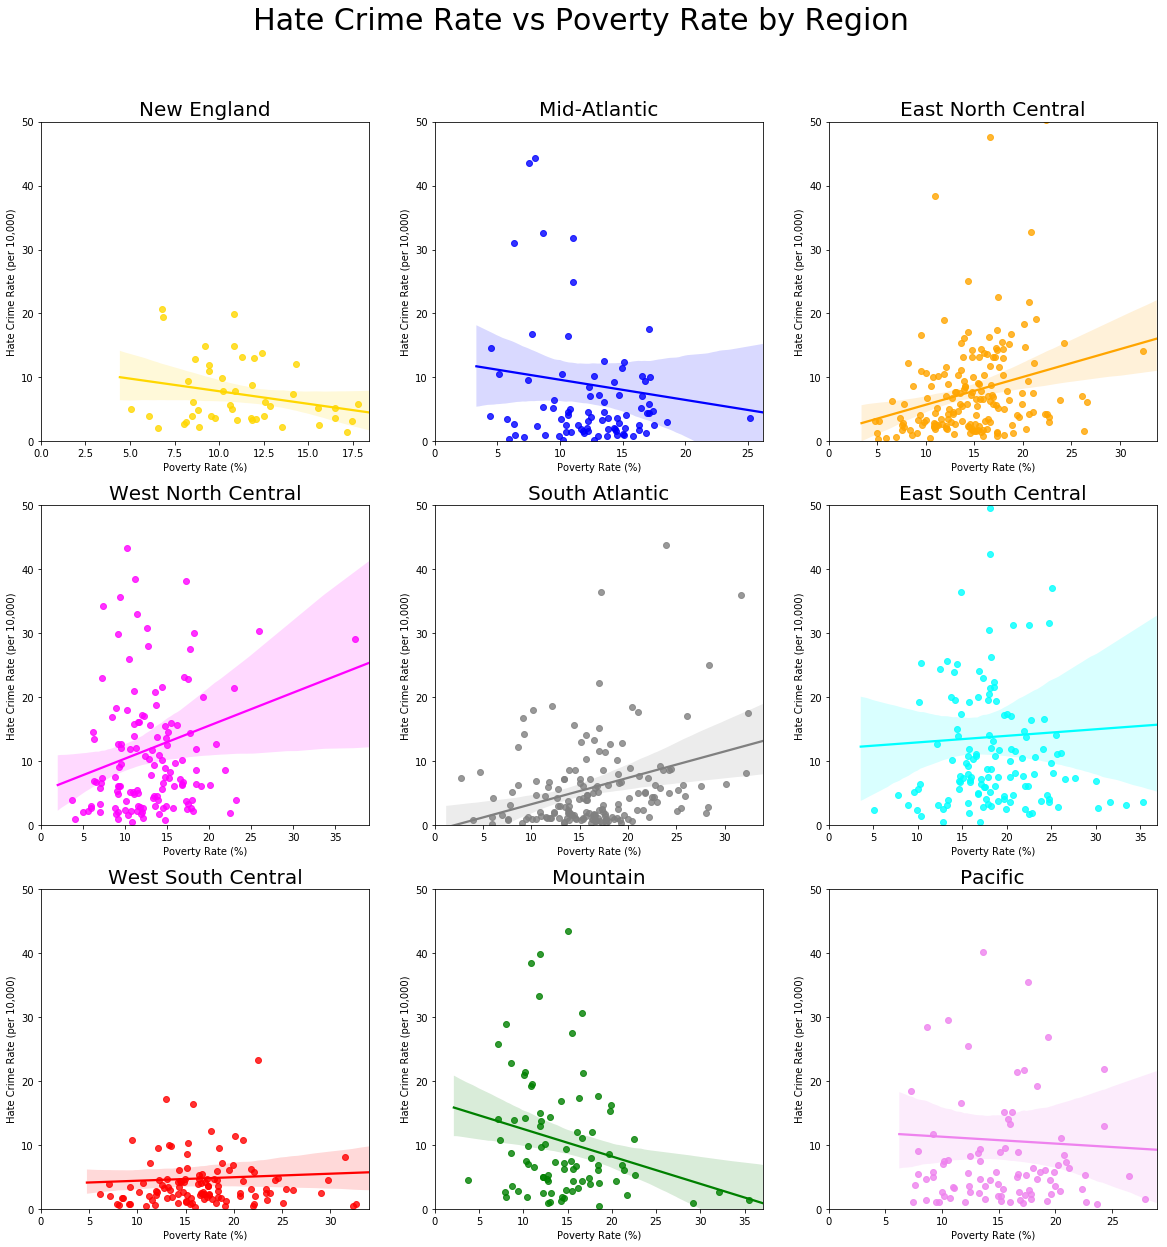

In [197]:
crime_rate = crime_vs_poverty["2012-2016 Combined Crime Rate"]
poverty = crime_vs_poverty["Poverty Rate"]

nweng_crmp = neweng_dp["2012-2016 Combined Crime Rate"]
nweng_pov = neweng_dp["Poverty Rate"]
mdatl_crmp = midatl_dp["2012-2016 Combined Crime Rate"]
mdatl_pov = midatl_dp["Poverty Rate"]
enctl_crmp = enctl_dp["2012-2016 Combined Crime Rate"]
enctl_pov = enctl_dp["Poverty Rate"]
wnctl_crmp = wnctl_dp["2012-2016 Combined Crime Rate"]
wnctl_pov = wnctl_dp["Poverty Rate"]
satl_crmp = satl_dp["2012-2016 Combined Crime Rate"]
satl_pov = satl_dp["Poverty Rate"]
esctl_crmp = esctl_dp["2012-2016 Combined Crime Rate"]
esctl_pov = esctl_dp["Poverty Rate"]
wsctl_crmp = wsctl_dp["2012-2016 Combined Crime Rate"]
wsctl_pov = wsctl_dp["Poverty Rate"]
mtn_crmp = mountain_dp["2012-2016 Combined Crime Rate"]
mtn_pov = mountain_dp["Poverty Rate"]
pac_crmp = pacific_dp["2012-2016 Combined Crime Rate"]
pac_pov = pacific_dp["Poverty Rate"]

plt.clf()

fig, axs = plt.subplots(figsize=(20,20), ncols=3, nrows=3)

sns.regplot(x=nweng_pov, y=nweng_crmp, data=neweng_dp, color="gold", label="New England", ax=axs[0][0])
sns.regplot(x=mdatl_pov, y=mdatl_crmp, data=midatl_dp, color="blue", label="Mid-Atlantic", ax=axs[0][1])
sns.regplot(x=enctl_pov, y=enctl_crmp, data=enctl_dp, color="orange", label="East North Central", ax=axs[0][2])
sns.regplot(x=wnctl_pov, y=wnctl_crmp, data=wnctl_dp, color="magenta", label="West North Central", ax=axs[1][0])
sns.regplot(x=satl_pov, y=satl_crmp, data=satl_dp, color="gray", label="South Atlantic", ax=axs[1][1])
sns.regplot(x=esctl_pov, y=esctl_crmp, data=esctl_dp, color="cyan", label="East South Central", ax=axs[1][2])
sns.regplot(x=wsctl_pov, y=wsctl_crmp, data=wsctl_dp, color="red", label="West South Central", ax=axs[2][0])
sns.regplot(x=mtn_pov, y=mtn_crmp, data=mountain_dp, color="green", label="Mountain", ax=axs[2][1])
sns.regplot(x=pac_pov, y=pac_crmp, data=pacific_dp, color="violet", label="Pacific", ax=axs[2][2])

axs[0][0].set_title("New England", size=20)
axs[0][1].set_title("Mid-Atlantic", size=20)
axs[0][2].set_title("East North Central", size=20)
axs[1][0].set_title("West North Central", size=20)
axs[1][1].set_title("South Atlantic", size=20)
axs[1][2].set_title("East South Central", size=20)
axs[2][0].set_title("West South Central", size=20)
axs[2][1].set_title("Mountain", size=20)
axs[2][2].set_title("Pacific", size=20)


[axs[i][0].set_xlabel("Poverty Rate (%)") for i in range(0, 3)]
[axs[i][1].set_xlabel("Poverty Rate (%)") for i in range(0, 3)]
[axs[i][2].set_xlabel("Poverty Rate (%)") for i in range(0, 3)]
[axs[0][i].set_ylabel("Hate Crime Rate (per 10,000)") for i in range(0, 3)]
[axs[1][i].set_ylabel("Hate Crime Rate (per 10,000)") for i in range(0, 3)]
[axs[2][i].set_ylabel("Hate Crime Rate (per 10,000)") for i in range(0, 3)]

[axs[i][0].set_xlim(0,) for i in range(0,3)]
[axs[i][1].set_xlim(0,) for i in range(0,3)]
[axs[i][2].set_xlim(0,) for i in range(0,3)]
[axs[i][0].set_ylim(0,50) for i in range(0,3)]
[axs[i][1].set_ylim(0,50) for i in range(0,3)]
[axs[i][2].set_ylim(0,50) for i in range(0,3)]

plt.suptitle("Hate Crime Rate vs Poverty Rate by Region", y = 0.96, fontsize=30)
#plt.title("Hate Crime Rate vs Foreign Born Rate by County")
#plt.ylabel("Hate Crime Rate (per 10,000)")
#plt.xlabel("Foreign Born Rate (%)")
plt.savefig("Crime-vs-Poverty_by_region.png")
plt.show()


<Figure size 432x288 with 0 Axes>

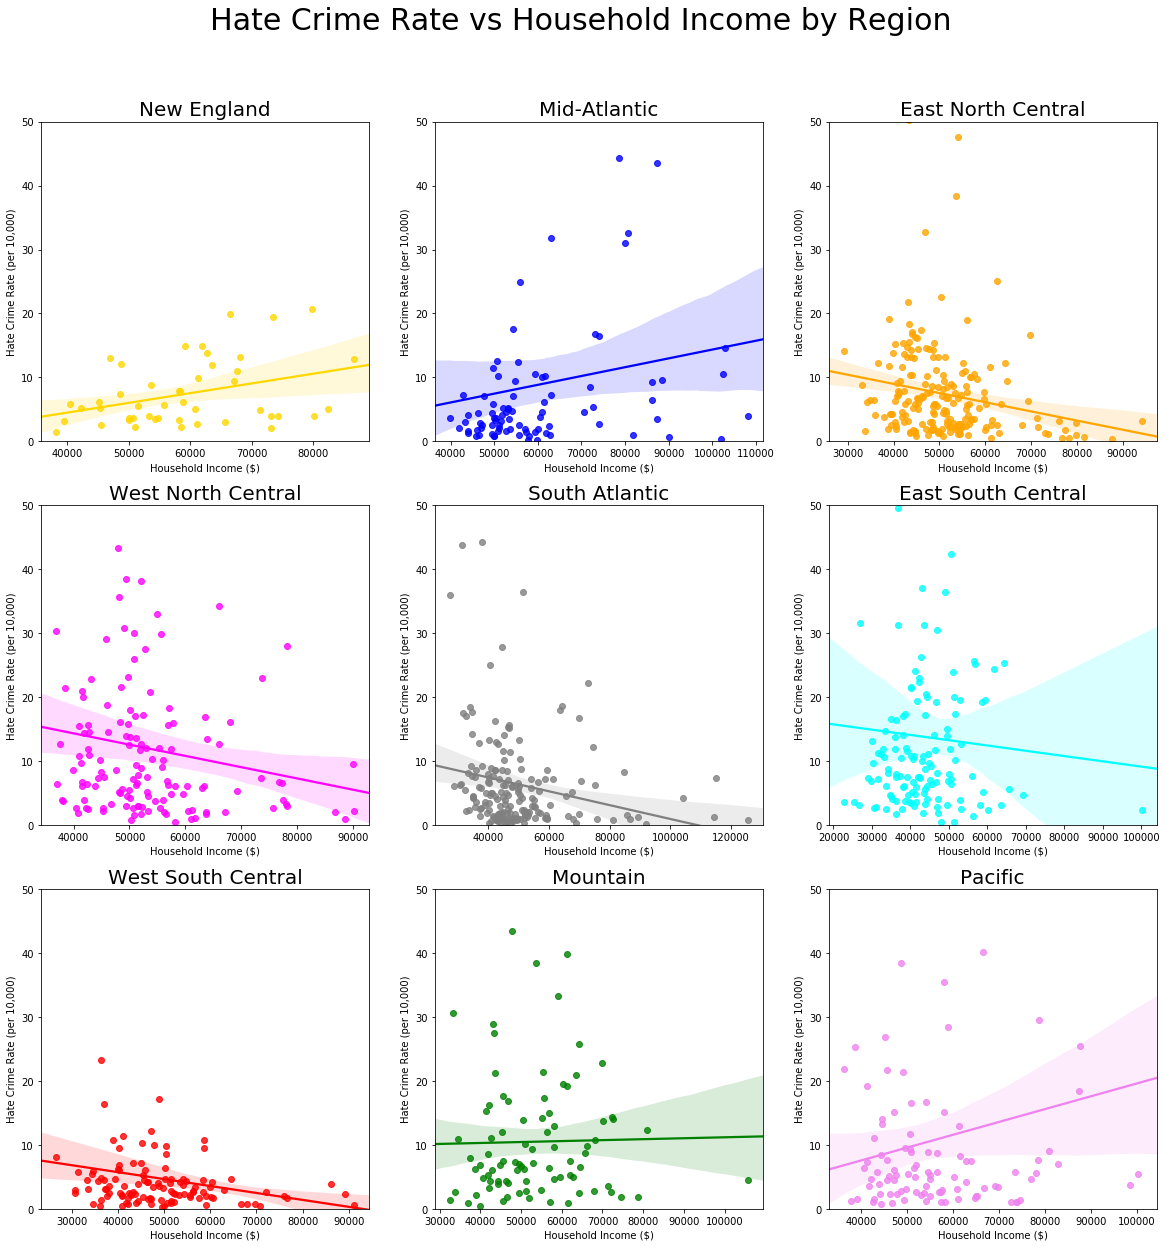

In [198]:
crime_rate = crime_vs_income["2012-2016 Combined Crime Rate"]
income = crime_vs_income["Household Income"]

nweng_crmi = neweng_di["2012-2016 Combined Crime Rate"]
nweng_inc = neweng_di["Household Income"]
mdatl_crmi = midatl_di["2012-2016 Combined Crime Rate"]
mdatl_inc = midatl_di["Household Income"]
enctl_crmi = enctl_di["2012-2016 Combined Crime Rate"]
enctl_inc = enctl_di["Household Income"]
wnctl_crmi = wnctl_di["2012-2016 Combined Crime Rate"]
wnctl_inc = wnctl_di["Household Income"]
satl_crmi = satl_di["2012-2016 Combined Crime Rate"]
satl_inc = satl_di["Household Income"]
esctl_crmi = esctl_di["2012-2016 Combined Crime Rate"]
esctl_inc = esctl_di["Household Income"]
wsctl_crmi = wsctl_di["2012-2016 Combined Crime Rate"]
wsctl_inc = wsctl_di["Household Income"]
mtn_crmi = mountain_di["2012-2016 Combined Crime Rate"]
mtn_inc = mountain_di["Household Income"]
pac_crmi = pacific_di["2012-2016 Combined Crime Rate"]
pac_inc = pacific_di["Household Income"]

plt.clf()

fig, axs = plt.subplots(figsize=(20,20), ncols=3, nrows=3)

sns.regplot(x=nweng_inc, y=nweng_crmi, data=neweng_di, color="gold", label="New England", ax=axs[0][0])
sns.regplot(x=mdatl_inc, y=mdatl_crmi, data=midatl_di, color="blue", label="Mid-Atlantic", ax=axs[0][1])
sns.regplot(x=enctl_inc, y=enctl_crmi, data=enctl_di, color="orange", label="East North Central", ax=axs[0][2])
sns.regplot(x=wnctl_inc, y=wnctl_crmi, data=wnctl_di, color="magenta", label="West North Central", ax=axs[1][0])
sns.regplot(x=satl_inc, y=satl_crmi, data=satl_di, color="gray", label="South Atlantic", ax=axs[1][1])
sns.regplot(x=esctl_inc, y=esctl_crmi, data=esctl_di, color="cyan", label="East South Central", ax=axs[1][2])
sns.regplot(x=wsctl_inc, y=wsctl_crmi, data=wsctl_di, color="red", label="West South Central", ax=axs[2][0])
sns.regplot(x=mtn_inc, y=mtn_crmi, data=mountain_di, color="green", label="Mountain", ax=axs[2][1])
sns.regplot(x=pac_inc, y=pac_crmi, data=pacific_di, color="violet", label="Pacific", ax=axs[2][2])

axs[0][0].set_title("New England", size=20)
axs[0][1].set_title("Mid-Atlantic", size=20)
axs[0][2].set_title("East North Central", size=20)
axs[1][0].set_title("West North Central", size=20)
axs[1][1].set_title("South Atlantic", size=20)
axs[1][2].set_title("East South Central", size=20)
axs[2][0].set_title("West South Central", size=20)
axs[2][1].set_title("Mountain", size=20)
axs[2][2].set_title("Pacific", size=20)


[axs[i][0].set_xlabel("Household Income ($)") for i in range(0, 3)]
[axs[i][1].set_xlabel("Household Income ($)") for i in range(0, 3)]
[axs[i][2].set_xlabel("Household Income ($)") for i in range(0, 3)]
[axs[0][i].set_ylabel("Hate Crime Rate (per 10,000)") for i in range(0, 3)]
[axs[1][i].set_ylabel("Hate Crime Rate (per 10,000)") for i in range(0, 3)]
[axs[2][i].set_ylabel("Hate Crime Rate (per 10,000)") for i in range(0, 3)]

#[axs[i][0].set_xlim(0,) for i in range(0,3)]
#[axs[i][1].set_xlim(0,) for i in range(0,3)]
#[axs[i][2].set_xlim(0,) for i in range(0,3)]
[axs[i][0].set_ylim(0,50) for i in range(0,3)]
[axs[i][1].set_ylim(0,50) for i in range(0,3)]
[axs[i][2].set_ylim(0,50) for i in range(0,3)]

plt.suptitle("Hate Crime Rate vs Household Income by Region", y = 0.96, fontsize=30)
#plt.title("Hate Crime Rate vs Foreign Born Rate by County")
#plt.ylabel("Hate Crime Rate (per 10,000)")
#plt.xlabel("Foreign Born Rate (%)")
plt.savefig("Crime-vs-Income_by_region.png")
plt.show()
